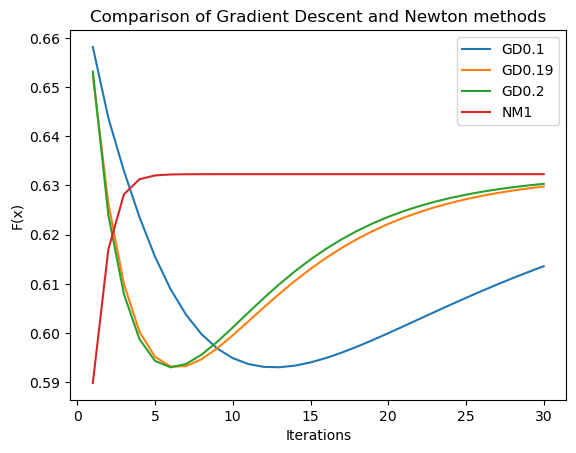

In [10]:
#Question 3
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def F(x):
    return x.T @ np.array([[5, 0], [0, 0.5]]) @ x + np.log(1 + np.exp(-x.T @ np.array([1, 1])))

# Gradient of F
def grad_F(x):
    term1 = np.array([[5, 0], [0, 0.5]]) @ x
    term2 = (-np.exp(-x.T @ np.array([1, 1])) / (1 + np.exp(-x.T @ np.array([1, 1])))) * np.array([1, 1])
    return term1 + term2

# Hessian of F
def hessian_F(x):
    term = (np.exp(-x.T @ np.array([1, 1])) / (1 + np.exp(-x.T @ np.array([1, 1])))**2) * np.array([1, 1]) @ np.array([1, 1]).T
    return np.array([[5, 0], [0, 0.5]]) + term

# Gradient Descent
def gradient_descent(eta, max_iter=30):
    x = np.array([0, 0])
    values = []
    for _ in range(max_iter):
        x = x - eta * grad_F(x)
        values.append(F(x))
    return values

# Newton's Method
def newton_method(eta, max_iter=30):
    x = np.array([0, 0])
    values = []
    for _ in range(max_iter):
        x = x - eta * np.linalg.inv(hessian_F(x)) @ grad_F(x)
        values.append(F(x))
    return values

# Plotting
iterations = list(range(1, 31))
plt.plot(iterations, gradient_descent(0.1), label="GD0.1")
plt.plot(iterations, gradient_descent(0.19), label="GD0.19")
plt.plot(iterations, gradient_descent(0.2), label="GD0.2")
plt.plot(iterations, newton_method(1), label="NM1")
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('F(x)')
plt.title('Comparison of Gradient Descent and Newton methods')
plt.show()


In [5]:
#Question 5 (b)
import numpy as np
import time
from numpy import linalg as LA

# Provided sampler function
def sampler(n, d=10, sigma=1, c_square=100):
    cov = np.diag([(0.25 ** i) * c_square for i in range(1, d + 1)])
    mean = [0] * d
    w = np.array([1] * d)
    np.random.seed(int(time.time() * 100000) % 100000)
    X = np.random.multivariate_normal(mean, cov, n)
    Y = np.matmul(X, w) + np.random.normal(0, sigma ** 2, n)
    return (X, Y)

# Gradient computation
def compute_gradient(X_t, Y_t, w_t, lambda_reg=0.1):
    return -2 * X_t * (Y_t - np.dot(w_t, X_t)) + 2 * lambda_reg * w_t

# Regular SGD Algorithm
def sgd(X, Y, beta, n_iter, lambda_reg=0.1):
    d = X.shape[1]
    w = np.zeros(d)
    sigma_squared_sum = np.zeros(d)
    
    for t in range(1, n_iter+1):
        X_t, Y_t = X[t-1], Y[t-1]
        gradient = compute_gradient(X_t, Y_t, w, lambda_reg)
        sigma_squared_sum += gradient ** 2
        eta_t = np.sqrt(1 / (beta * sigma_squared_sum))
        w = w - eta_t * gradient
        
    return w

# Adagrad Algorithm
def adagrad(X, Y, xi, n_iter, lambda_reg=0.1):
    d = X.shape[1]
    w = np.zeros(d)
    sigma_squared_sum = np.zeros(d)
    
    for t in range(1, n_iter+1):
        X_t, Y_t = X[t-1], Y[t-1]
        gradient = compute_gradient(X_t, Y_t, w, lambda_reg)
        sigma_squared_sum += gradient ** 2
        alpha_t = np.sqrt(1 / (xi + sigma_squared_sum))
        w = w - np.multiply(alpha_t, gradient)
        
    return w

# Example usage:
n = 1000  # Number of data points
X, Y = sampler(n)  # Generate sample data

# Parameters
lambda_reg = 0.1  # Regularization term
n_iter = 1000  # Number of iterations

# Setting beta = 2(sigma_1^2 + lambda)
sigma_1_squared = np.var(X[:, 0])  # Variance of the first feature
beta = 2 * (sigma_1_squared + lambda_reg)  # Parameter for SGD

# Execute SGD algorithm
w_sgd = sgd(X, Y, beta, n_iter)

# Parameters for Adagrad
xi = 2 * (sigma_1_squared + lambda_reg)  # Parameter for Adagrad

# Execute Adagrad algorithm
w_adagrad = adagrad(X, Y, xi, n_iter)

# Display resulting parameter vectors
print("Resulting parameter vector from SGD:", w_sgd)
print("Resulting parameter vector from Adagrad:", w_adagrad)


Resulting parameter vector from SGD: [ 0.96115246  1.02819601  0.93368968  0.78951546  0.62944969  0.26571406
 -0.01608895  0.02685857  0.00442185  0.00104452]
Resulting parameter vector from Adagrad: [ 9.53953801e-01  1.04333287e+00  9.75495333e-01  8.40537378e-01
  7.85425673e-01  2.73692661e-01 -4.47961362e-02  2.31847332e-02
 -4.55468478e-03 -3.12004511e-04]


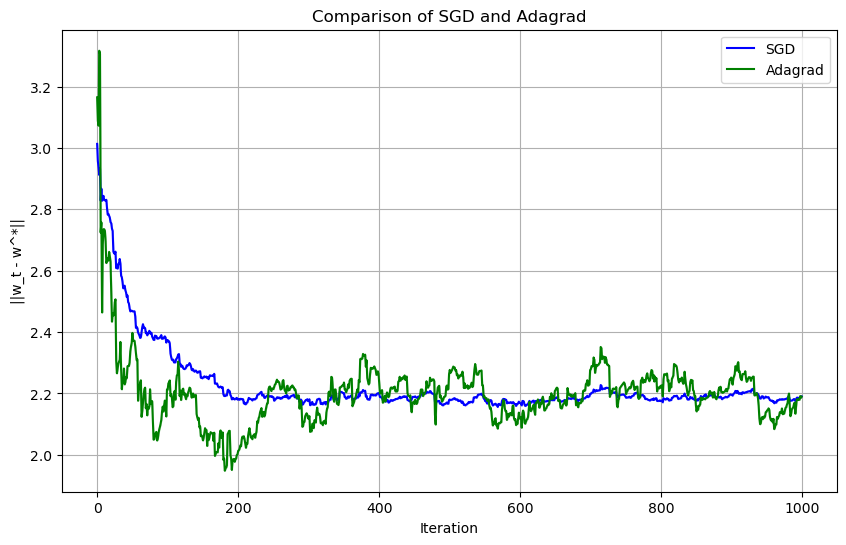

In [6]:
#Question 5(c)
import matplotlib.pyplot as plt

# Parameters
n = 1000  # Number of data points
X, Y = sampler(n)  # Generate sample data using the function from task (b)
n_runs = 10  # Number of runs
n_iter = 1000  # Number of iterations
w_star = np.array([1] * X.shape[1])  # True parameter vector

# Lambda and beta setting
lambda_reg = 0.1  # Regularization term
sigma_1_squared = np.var(X[:, 0])  # Variance of the first feature
beta = 2 * (sigma_1_squared + lambda_reg)  # Parameter for SGD
xi = beta  # Parameter for Adagrad, set equal to beta for simplicity

# Run algorithms and store paths
sgd_paths = [sgd_path(X, Y, beta, n_iter, lambda_reg) for _ in range(n_runs)]
adagrad_paths = [adagrad_path(X, Y, xi, n_iter, lambda_reg) for _ in range(n_runs)]

# Calculate average and standard deviation of ||w_t - w^*|| for each t
sgd_distances = np.array([np.linalg.norm(path - w_star, axis=1) for path in sgd_paths])
sgd_mean = np.mean(sgd_distances, axis=0)
sgd_std = np.std(sgd_distances, axis=0)

adagrad_distances = np.array([np.linalg.norm(path - w_star, axis=1) for path in adagrad_paths])
adagrad_mean = np.mean(adagrad_distances, axis=0)
adagrad_std = np.std(adagrad_distances, axis=0)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sgd_mean, label='SGD', color='blue')
plt.fill_between(range(n_iter), sgd_mean-sgd_std, sgd_mean+sgd_std, color='blue', alpha=0.2)

plt.plot(adagrad_mean, label='Adagrad', color='green')
plt.fill_between(range(n_iter), adagrad_mean-adagrad_std, adagrad_mean+adagrad_std, color='green', alpha=0.2)

plt.xlabel('Iteration')
plt.ylabel('||w_t - w^*||')
plt.legend()
plt.title('Comparison of SGD and Adagrad')
plt.grid(True)
plt.show()
